# Algorithm combination (Sobel, Magnitud & Direction)

In [1]:
# Importing Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [2]:
# Read in an image
#image = mpimg.imread('signs_vehicles_xygrad.jpg')
image = cv2.imread('signs_vehicles_xygrad.jpg')

# Convert to RGB
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
# Params for Sobel
ksize = 3
thresh_min = 20
thresh_max = 100

## Helper Functions

In [4]:
def convert2gray(img):
    gray = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
    
    # Return the result
    return gray

def abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=(0, 255)):
    # Convert to grayscale
    gray = convert2gray(image)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

def mag_thresh(img, sobel_kernel=ksize, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = convert2gray(image)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx**2 + sobely**2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag)/255 
    gradmag = (gradmag/scale_factor).astype(np.uint8) 
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
    mag_binary[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return mag_binary

def dir_threshold(img, sobel_kernel=ksize, thresh=(0, np.pi/2)):
    # Convert to grayscale
    gray = convert2gray(image)
    # Calculate the x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Take the absolute value of the gradient direction, 
    # apply a threshold, and create a binary image result
    absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    dir_binary =  np.zeros_like(absgraddir)
    dir_binary[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1

    # Return the binary image
    return dir_binary

def show_image(image,name=str):
    fig = plt.figure()
    figsize=(8, 3) # Set image size
    ax = plt.Axes(fig,[0,0,1,1])
    ax.set_title(name, fontsize=15) # Set image title
    ax.set_axis_off() # Hide Axes
    fig.add_axes(ax)
    ax.imshow(image, cmap = 'gray')
    plt.show()
    #fig.savefig('out.png') #Saves image

In [5]:
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(thresh_min, thresh_max))
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(thresh_min, thresh_max))
mag_binary = mag_thresh(image, sobel_kernel = 9, mag_thresh = (30,100))
dir_binary = dir_threshold(image, sobel_kernel= 3, thresh = (0.7, 1.3))

# Combined Output
combined = np.zeros_like(dir_binary)
combined[((gradx == 1) & (grady == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1

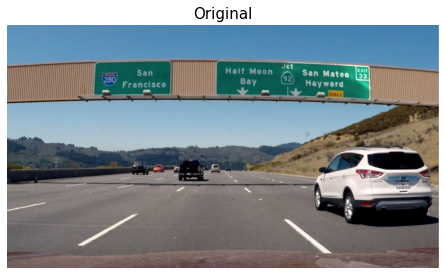

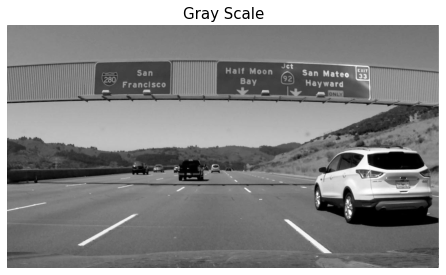

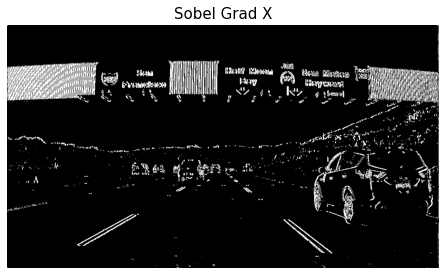

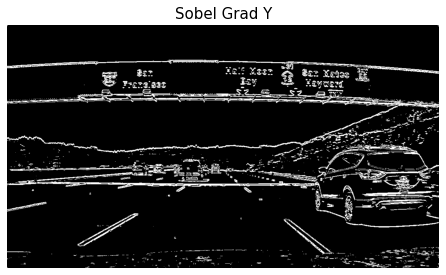

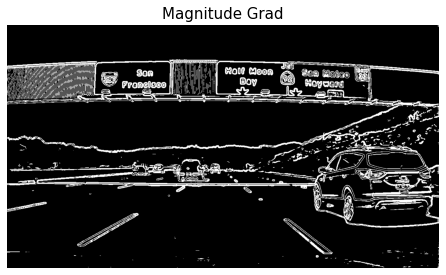

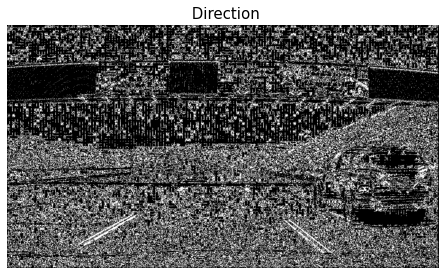

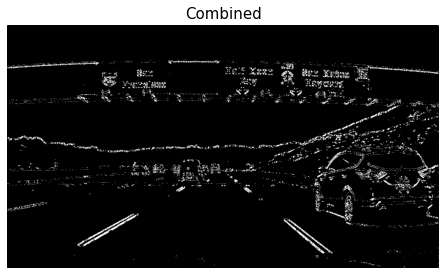

In [6]:
show_image(RGB_img, 'Original')
show_image(convert2gray(image),'Gray Scale')
show_image(gradx,'Sobel Grad X')
show_image(grady, 'Sobel Grad Y')
show_image(mag_binary, 'Magnitude Grad')
show_image(dir_binary, ' Direction')
show_image(combined, 'Combined')